In [1]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Models")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Models/FR_Unet")
import fr_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME_1 = 'fr_unet_40ep_256_512_sG'
INPUT_SHAPE_1 = (256, 256, 1)
RESIZE_SHAPE_1 = (512, 512, 1)
MODEL_PATH_1 = "/visuworks/Blindless_AIFFELTON/Models/FR_Unet/model_parameters/" + FILE_NAME_1 + ".tf"
HISTORY_PATH_1 = "/visuworks/Blindless_AIFFELTON/Models/FR_Unet/history/" + FILE_NAME_1 + '_history' ".json"

FILE_NAME_2 = 'fr_unet_40ep_64_512_sG'
INPUT_SHAPE_2 = (64, 64, 1)
RESIZE_SHAPE_2 = (512, 512, 1)
MODEL_PATH_2 = "/visuworks/Blindless_AIFFELTON/Models/FR_Unet/model_parameters/" + FILE_NAME_2 + ".tf"
HISTORY_PATH_2 = "/visuworks/Blindless_AIFFELTON/Models/FR_Unet/history/" + FILE_NAME_2 + '_history' ".json"

SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-01-30 06:15:23.655470: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 06:15:23.655494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 06:15:23.656403: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 06:15:23.661422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 06:15:24.243701: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}


# Create augmentation
test_preproc_1 = preprocess.build_augmentation_for_general(RESIZE_SHAPE_1[0], RESIZE_SHAPE_1[0], is_train=False)
test_preproc_2 = preprocess.build_augmentation_for_general(RESIZE_SHAPE_2[0], RESIZE_SHAPE_2[0], is_train=False)

test_generator_1 = data_generator.SlicedDataGenerator(
    SOURCE,
    number_of_images = 1,
    output_size=INPUT_SHAPE_1,
    resize_shape = RESIZE_SHAPE_1,
    is_train=False,
    augmentation= test_preproc_1
)

test_generator_2 = data_generator.SlicedDataGenerator(
    SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE_2,
    output_size=INPUT_SHAPE_2,
    resize_shape = RESIZE_SHAPE_2,
    is_train=False,
    augmentation= test_preproc_2
)

2024-01-30 06:15:25.476137: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 06:15:25.512073: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 06:15:25.512288: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

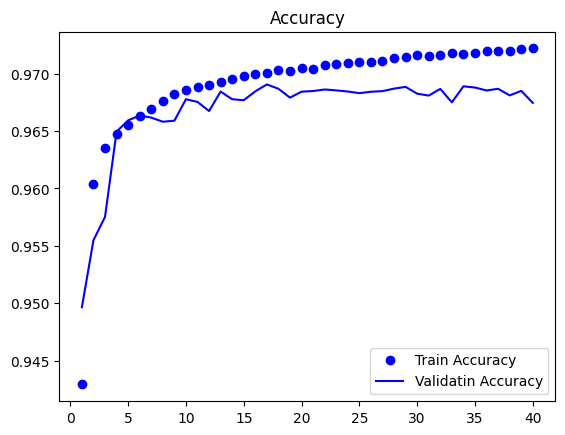

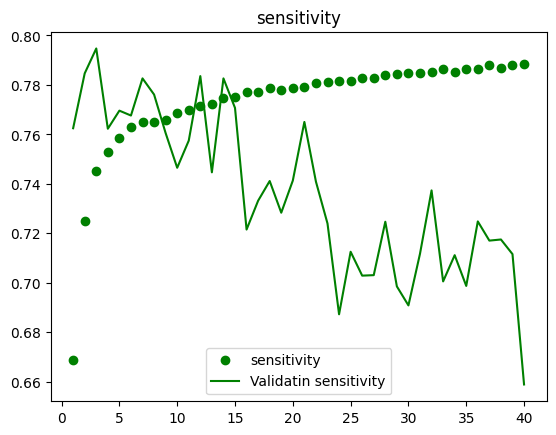

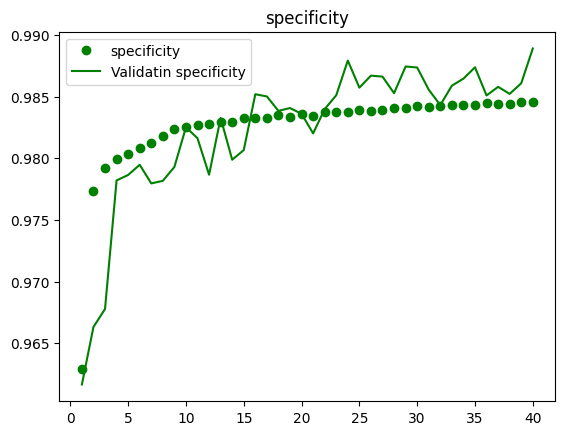

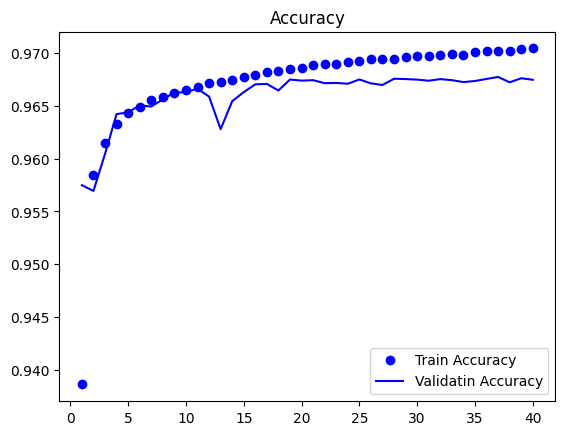

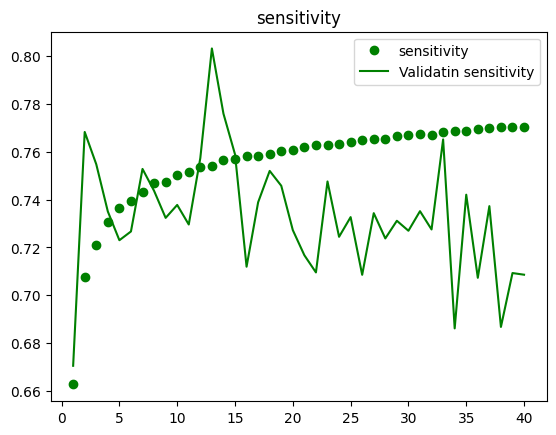

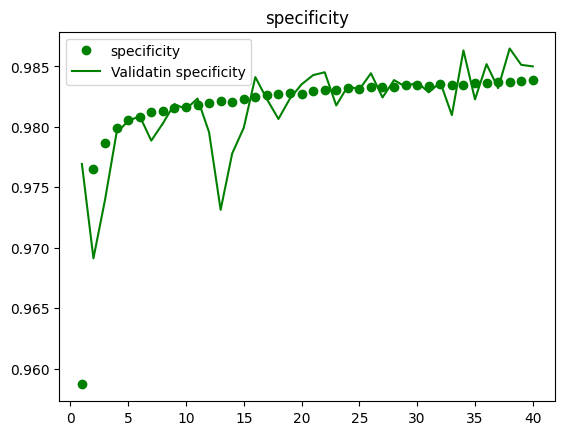

<Figure size 640x480 with 0 Axes>

In [3]:
# Load the model with custom_objects parameter
model_1 = tf.keras.models.load_model(MODEL_PATH_1, custom_objects=custom_objects)
model_2 = tf.keras.models.load_model(MODEL_PATH_2, custom_objects=custom_objects)

check_result.plot_history(HISTORY_PATH_1)
check_result.plot_history(HISTORY_PATH_2)

In [4]:
data_1 = check_result.SG_result(model_1, 100, SOURCE, INPUT_SHAPE_1, RESIZE_SHAPE_1, test_preproc_1, is_test=True)
data_2 = check_result.SG_result(model_2, 100, SOURCE, INPUT_SHAPE_2, RESIZE_SHAPE_2, test_preproc_2, is_test=True)

2024-01-30 06:15:44.127982: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-30 06:15:45.132866: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 790.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-30 06:15:45.132906: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 790.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-30 06:15:45.341256: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 790.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there co

In [5]:
print(len(data_1))

100


In [ ]:
check_result.compare_model_result(data_1, data_2, 70)